**Dimensionality reduction of images to improve time efficiency of models**
Transforming image features into lower dimension vectors to speed up training with negligible effect on performance

importing dependencies and data


In [0]:
import numpy as np
import pandas as pd
from keras.datasets import mnist


Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

one hot encoding Target variable

In [0]:
x_train=x_train/255
labels=y_train
labels=np.asarray(labels)
lr = np.arange(10)
one_hot=np.zeros((len(labels),10))
for i in range(len(labels)):
    one_hot[i,:]=(lr==labels[i]).astype(np.float)

In [0]:
one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [0]:
x_train.shape

(60000, 28, 28)

Using a simple fully connected architecture

In [0]:
from keras.layers import Dense,Input,Flatten
from keras.models import Model 
image_input = Input(shape=(28,28))
a=Flatten()(image_input)
fc1=Dense(128,activation='relu',name='fc1')(a)
out=Dense(10,activation='softmax',name='out')(fc1)
nn=Model(image_input,out)
nn.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               100480    
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
nn.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

training of NN

In [0]:
import time
t=time.time()
nn.fit(x_train,one_hot,batch_size=128, epochs=10, verbose=1, validation_split=0.2)
print(time.time()-t)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 2s 44us/step - loss: 0.4131 - acc: 0.8852 - val_loss: 0.2402 - val_acc: 0.9348
Epoch 2/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.1886 - acc: 0.9468 - val_loss: 0.1611 - val_acc: 0.9559
Epoch 3/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.1380 - acc: 0.9606 - val_loss: 0.1378 - val_acc: 0.9601
Epoch 4/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.1082 - acc: 0.9688 - val_loss: 0.1172 - val_acc: 0.9657
Epoch 5/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.0858 - acc: 0.9754 - val_loss: 0.1117 - val_acc: 0.9677
Epoch 6/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.0710 - acc: 0.9794 - val_loss: 0.1031 - val_acc: 0.9688
Epoch 7/10
48000/48000 [==

In [0]:

from keras.models import load_model
nn.save('my_model.h5')

In [0]:
x_test=x_test/255
test_labels=y_test
lr = np.arange(10)
one_hot_test=np.zeros((len(test_labels),10))
for i in range(len(test_labels)):
    one_hot_test[i,:]=(lr==test_labels[i]).astype(np.float)

Test loss and accuracy

In [0]:
loss_and_metrics = nn.evaluate(x_test, one_hot_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.07794746035949793
Test Accuracy 0.9755


WITH PCA


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Vectorizing our images

In [0]:
image_input = Input(shape=(28,28))
a=Flatten()(image_input)
model=Model(image_input,a)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [0]:
flat=model.predict(x_train)

In [0]:
flat.shape

(60000, 784)

Transforming feature sets into lower dimension vectors using PCA to improve time efficiency while retaining 95% of variance

In [0]:
pca=PCA(0.95)
pca.fit(flat)
components_train = pca.transform(flat)
components_test = pca.transform(model.predict(x_test))

In [0]:
pca.n_components_

154

In [0]:
image_input = Input(shape=(154,))
fc1=Dense(32,activation='relu',name='fc1')(image_input)
out=Dense(10,activation='softmax',name='out')(fc1)
nn_pca=Model(image_input,out)
nn_pca.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 154)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 32)                4960      
_________________________________________________________________
out (Dense)                  (None, 10)                330       
Total params: 5,290
Trainable params: 5,290
Non-trainable params: 0
_________________________________________________________________


In [0]:
nn_pca.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

Training of NN after transformation

In [0]:
import time
t=time.time()
nn_pca.fit(components_train,one_hot,batch_size=128, epochs=10, verbose=1, validation_split=0.2)
print(time.time()-t)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 19us/step - loss: 0.9480 - acc: 0.7539 - val_loss: 0.3634 - val_acc: 0.9068
Epoch 2/10
48000/48000 [==============================] - 1s 14us/step - loss: 0.3102 - acc: 0.9137 - val_loss: 0.2478 - val_acc: 0.9307
Epoch 3/10
48000/48000 [==============================] - 1s 13us/step - loss: 0.2353 - acc: 0.9325 - val_loss: 0.2093 - val_acc: 0.9410
Epoch 4/10
48000/48000 [==============================] - 1s 13us/step - loss: 0.1988 - acc: 0.9427 - val_loss: 0.1852 - val_acc: 0.9482
Epoch 5/10
48000/48000 [==============================] - 1s 13us/step - loss: 0.1745 - acc: 0.9494 - val_loss: 0.1715 - val_acc: 0.9510
Epoch 6/10
48000/48000 [==============================] - 1s 14us/step - loss: 0.1570 - acc: 0.9543 - val_loss: 0.1603 - val_acc: 0.9534
Epoch 7/10
48000/48000 [==============================] - 1s 13us/step - loss: 0.1431 - acc: 0.9591 - val_loss: 0.1535 - val_acc

Test loss and accuracy

In [0]:
loss_and_metrics = nn_pca.evaluate(components_test, one_hot_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.13025651152282952
Test Accuracy 0.9626


In [0]:
approximation = pca.inverse_transform(components_train)

Text(0.5, 1.0, '95% of Explained Variance')

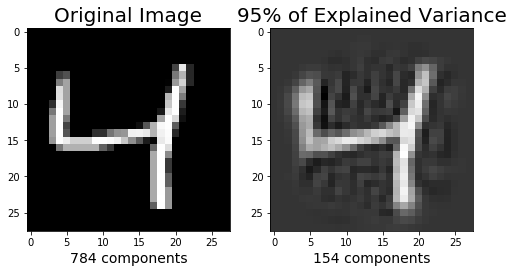

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(flat[2].reshape(28,28),cmap = plt.cm.gray, interpolation='nearest',)
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20)

# 154 principal components
plt.subplot(1, 2, 2)
plt.imshow(approximation[2].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest')
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)

Above approch can be used in between CNN layers and fully connected layers.

cnn works as a features extractor, theses features can be transformed into lower dimension using either linear or non linear dimension reduction techniques befores using these features for classification.
